# Subset and Plot CMIP Data Using Xarray

In this notebook we demonstrate how to use Xarray to access, subset and plot the CMIP data:

* Subsetting
* Xarray.plot( )

This example uses Coupled Model Intercomparison Project (CMIP6) collections. For more information, please visit [data catalogue]( https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f5194_5909_8003_9216) and [terms of use]( https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html).

---------

- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP, Xarray, slicing, subset, plot
- Create Date: 2020-Aug
---

#### Import the xarray and netCDF modules

In [1]:
import xarray as xr
import netCDF4 as nc
%matplotlib inline

#### Local path on /g/data

In [2]:
path_CMIP6 = '/g/data/oi10/replicas/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM-CM6-1/ssp126/r1i1p1f2/Amon/tas/gr/v20190219/tas_Amon_CNRM-CM6-1_ssp126_r1i1p1f2_gr_201501-210012.nc'

In [3]:
f1 = xr.open_dataset(path_CMIP6) 
f1

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 128, lon: 256, time: 1032)
Coordinates:
  * lat          (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon          (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height       float64 ...
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    tas          (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-11-15T10:36:39Z
    description:            Future scenario with low radiative forcing by the...
    title:                  CNRM-CM6-1 model output prepared for CMIP6 / Scen...
    activity_id:            ScenarioMIP
    contact:                contact.cmip@meteo.fr
    data_specs_version:     01.00.21
    dr2xml_version:         1.16
    experiment_id:          ssp126
    experiment:             update of RCP2.6 based on SSP1
    external_variables:     areacella
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS...
    grid:                   data regridded to a T127 gaussian grid (128x256 l...
    grid_label:             gr
    nominal_resolution:     250 km
    initialization_index:   1
    institution_id:         CNRM-CERFACS
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    license:                CMIP6 model data produced by CNRM-CERFACS is lice...
    mip_era:                CMIP6
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_activity_id:     CMIP
    parent_source_id:       CNRM-CM6-1
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r1i1p1f2
    branch_method:          standard
    branch_time_in_parent:  60265.0
    branch_time_in_child:   60265.0
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    references:             http://www.umr-cnrm.fr/cmip6/references
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    source_id:              CNRM-CM6-1
    source_type:            AOGCM
    sub_experiment_id:      none
    sub_experiment:         none
    table_id:               Amon
    variable_id:            tas
    variant_label:          r1i1p1f2
    EXPID:                  CNRM-CM6-1_ssp126_r1i1p1f2
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    history:                none
    tracking_id:            hdl:21.14100/05131cf0-ec69-4bfc-92f8-e1d40aae26f5

### Subsetting

There are multiple ways to select subsets of the data using xarray. 

#### 1. Using the regular numpy method of indexing:

In [4]:
tas = f1.tas
tas_subset = tas[1:10,:,0]
print(tas.shape)
print(tas_subset.shape)

(1032, 128, 256)
(9, 128)


But in the above it is not as simple to know *where* the values selected have come from. xarray.sel() permits label based indexing.

#### 2. Using .sel( ) for label based indexing

In the case below we find the values of tas at latitude of -12.46 and longitude at 130.85 degrees - approximately Darwin. This is done using the `.sel()` method which can be performed on a Dataset or DataArray. This method permits selection based on coordinates rather than indices. 

However, it is unlikely there is a specific lat/lon coordinate value at those exact locations. For example, look at the available values of longitude:

In [5]:
f1.lon

<xarray.DataArray 'lon' (lon: 256)>
array([  0.     ,   1.40625,   2.8125 , ..., 355.78125, 357.1875 , 358.59375])
Coordinates:
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 2.0
Attributes:
    axis:           X
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east

There is no longitude value at 130.85 deg E, thus if we wanted to find the tas over Darwin, we need to use interpolation. This is done by adding an argument to the `.sel()` command and in this case we are going to use the nearest neighbour method.

In [6]:
tas.sel(lon=130.85,lat=-12.46,method='nearest')

<xarray.DataArray 'tas' (time: 1032)>
array([301.50644, 300.10107, 301.72717, ..., 303.33353, 303.90588, 302.9052 ],
      dtype=float32)
Coordinates:
    lat      float64 -11.91
    lon      float64 130.8
    height   float64 2.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

### Subsetting in Time 
Notice that the time variable has also been automatically decoded by xarray to represent dates rather than floats

In [7]:
f1.time

<xarray.DataArray 'time' (time: 1032)>
array(['2015-01-16T12:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-03-16T12:00:00.000000000', ..., '2100-10-16T12:00:00.000000000',
       '2100-11-16T00:00:00.000000000', '2100-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1850-01-01 00:00:00
    bounds:         time_bounds

Compared to the original numpy data:

In [8]:
ft = xr.open_dataset(path_CMIP6,decode_times=False)
ft.time

<xarray.DataArray 'time' (time: 1032)>
array([60280.5, 60310. , 60339.5, ..., 91599.5, 91630. , 91660.5])
Coordinates:
    height   float64 ...
  * time     (time) float64 6.028e+04 6.031e+04 ... 9.163e+04 9.166e+04
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    calendar:       gregorian
    units:          days since 1850-01-01 00:00:00
    time_origin:    1850-01-01 00:00:00
    bounds:         time_bounds

This decoding is very helpful in quickly selecting data over specific time periods.

### Exercise

Using the `.sel` method shown above. Find the tasmax values during the year 2020. What are the dimensions of tasmax in this case?

<a href="#ans1" data-toggle="collapse">Answer</a>
<div class="collapse" id="ans1">
<pre><code>
tas.sel(time='2020')
</code></pre>
</div>

### Selecting data within a range of values

In the above examples we found the tasmax values at a nearest lat/lon location, and a specific time. To select data over a range of values you can use the `slice()` function under the `sel()` command.

In the below case we are getting the subset of tasmax data from years 2000 to 2005 and between latitudes 20S to 20N.

In [9]:
subset = tas.sel(time=slice('2016','2020'),lat=slice(-20,20))
subset

<xarray.DataArray 'tas' (time: 60, lat: 28, lon: 256)>
[430080 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -18.91 -17.51 -16.11 -14.71 ... 16.11 17.51 18.91
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    height   float64 2.0
  * time     (time) datetime64[ns] 2016-01-16T12:00:00 ... 2020-12-16T12:00:00
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

### Exercise
Find the tasmax values over Australia, between latitudes -45 to -10 deg N and longitudes of 110 to 155 deg E and during the years from 2015 to 2020.

### Xarray .plot()

Plotting with xarray is very simple. Xarray plots will automatically define the axes values and labels based on the information contained within the data array.

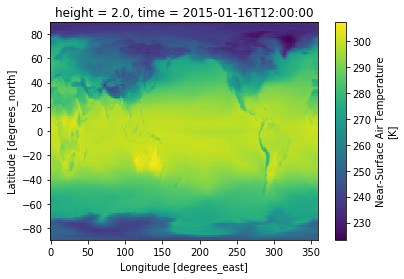

In [10]:
tas.sel(time='2015-01-16',method='nearest').plot()

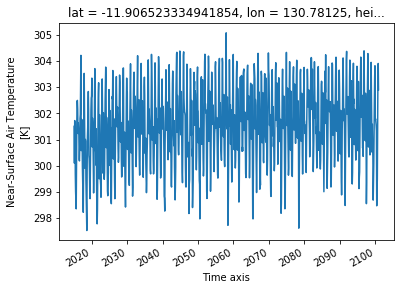

In [11]:
tas.sel(lon=130.85,lat=-12.46,method='nearest').plot()

### Exercise

Try plotting the colormap of tasmax in the region over Australia. So that is between latitudes -45 to -10 deg N of and longitudes of 110 to 155 deg E. Pick the date for the year and month you were born and plot for that.

### Summary

This example shows how to use xarray to do subsetting and plotting.

## Reference 

http://xarray.pydata.org/en/stable/